# Pengenalan Pola

## Ujian Tengah Semester

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di https://elearning.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **uts_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk ujian ini.

**Kolaborasi**: Anda tidak diperbolehkan untuk berdiskusi dengan teman Anda. Dilarang keras menyalin kode maupun tulisan dari teman Anda. Kecurangan akan berakibat pada nilai nol untuk ujian ini.

### Petunjuk

Untuk kelancaran Anda, gunakan Python 3 dalam tugas ini. Selain itu, terdapat beberapa _packages_ yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scikit-learn
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

## Sumber Data

https://www.kaggle.com/geomack/spotifyclassification#data.csv

Deskripsi data: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

In [2]:
df = pd.read_csv('data.csv', index_col=0)

In [100]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## 1. Eksplorasi Awal Data (20 poin)

### Soal 1.1 (2 poin)

Bagi dataset di atas menjadi data latih dan data uji, i.e. `X_train`, `X_test`, `y_train`, `y_test` dengan proporsi 70:30.

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test= train_test_split(df, test_size=0.3)

### Soal 1.2 (1 poin)

Buatlah variabel `columns` berupa list yang berisi semua kolom dengan tipe data numerik dalam data, kecuali `target`.

In [10]:
df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [79]:
columns = df

In [80]:
columns["duration_ms"] = pd.to_numeric(columns["duration_ms"])

In [81]:
columns["key"] = pd.to_numeric(columns["key"])

In [82]:
columns["mode"] = pd.to_numeric(columns["mode"])

In [83]:
columns = columns.values.tolist()

*Referensi https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas, https://datatofish.com/convert-pandas-dataframe-to-list/*

### Soal 1.3 (2 poin)

Gambarkan heatmap dari korelasi semua variabel numerik dalam data `X_train`.

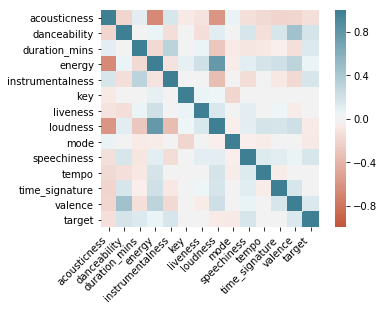

In [84]:
# Kode Anda di sini
corr = X_train.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1,center=0,
    cmap = sns.diverging_palette(20,220,n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

*Regerensi https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec*

### Soal 1.4 (2 poin)

Ada berapa banyak `artist` yang unik dalam `X_train` dan `X_test`?

In [32]:
unik_train = X_train['artist'].unique()
len(unik_train)

1044

In [85]:
unik_test = X_test['artist'].unique()
len(unik_test)

490

*Referensi https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/*

### Soal 1.5.a (2 poin)

Ubahlah kolom `duration_ms` dalam `X_train` dan `X_test` menjadi `duration_mins` yang berisi durasi lagu dalam menit.

In [86]:
X_train = X_train.rename(columns = {
    "duration_ms" : "duration_mins"
})


In [87]:
X_test = X_test.rename(columns = {
    "duration_ms" : "duration_mins"
})

### Soal 1.5.b (2 poin)

Gambarkan histogram dari kolom `duration_mins` di `X_train`.

Text(0, 0.5, 'Count')

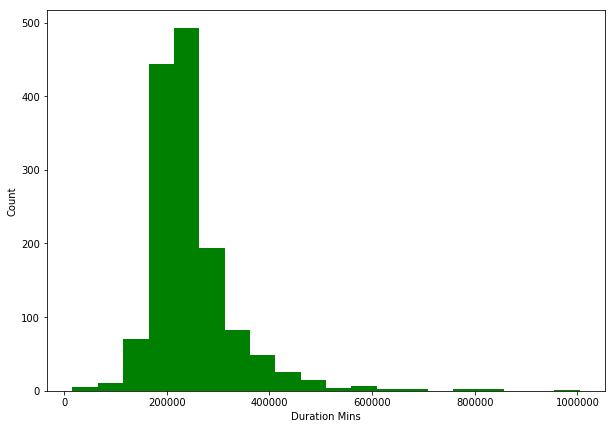

In [88]:
plt.figure(figsize= (10,7))
x= X_train["duration_mins"]

plt.hist(x, bins=20, color="green")
plt.xlabel('Duration Mins')
plt.ylabel("Count")

*Referensi https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/*

### Soal 1.6 (4 poin)

Gambarkan histogram dari semua variabel yang ada dalam variabel `columns`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB54D44048>,
      dtype=object)

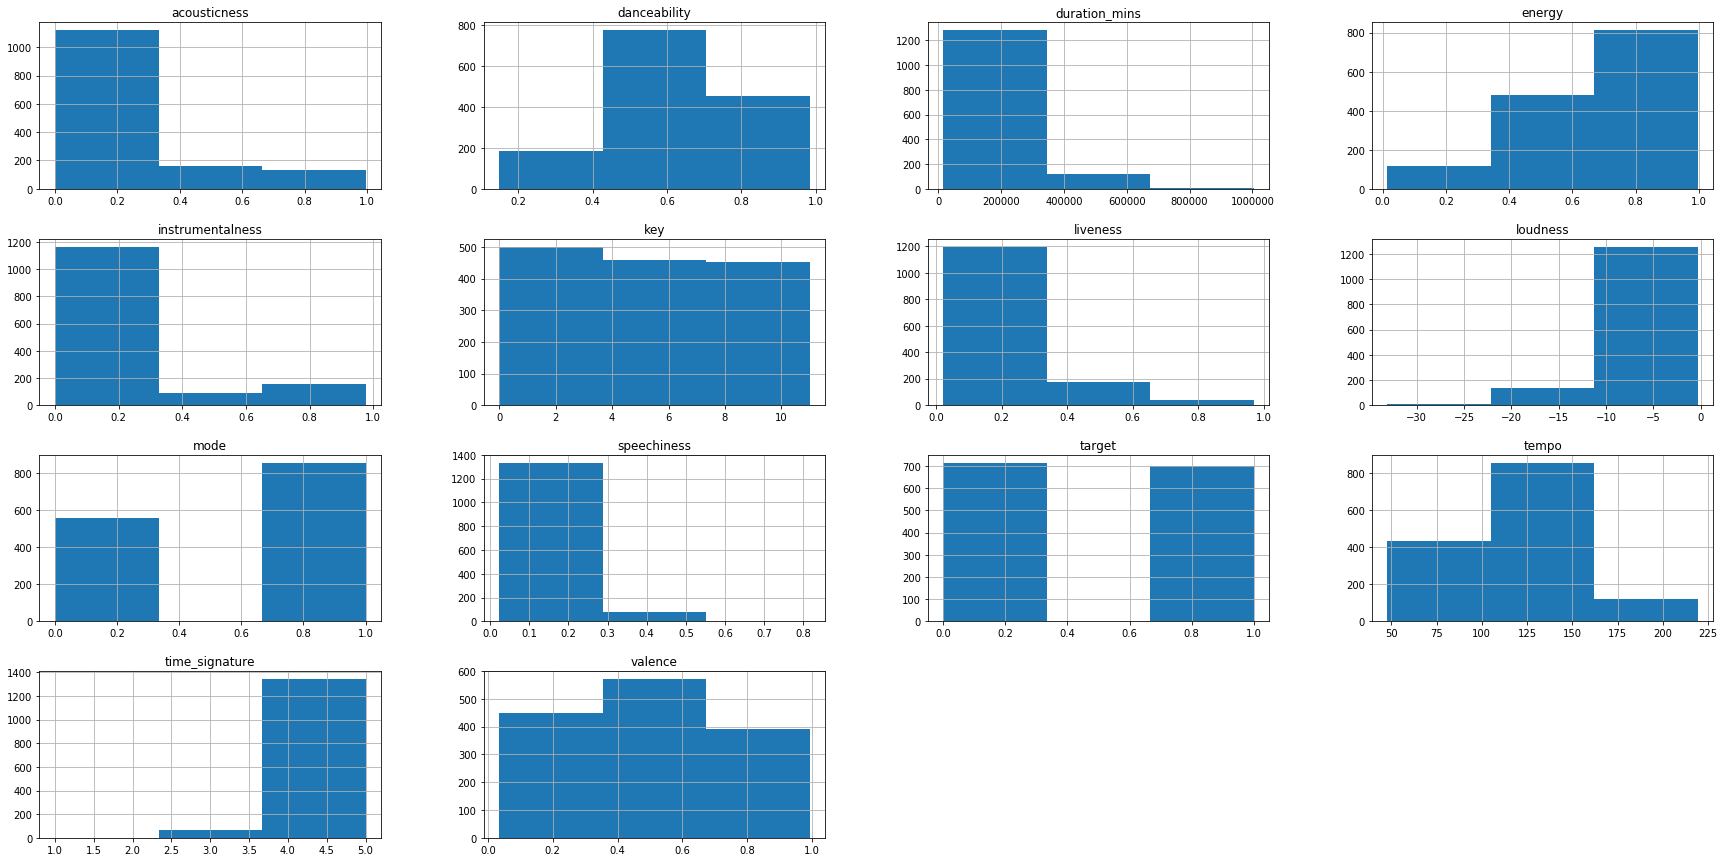

In [98]:
X_train.hist(bins=3, figsize= (30,15))

*Referensi https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d*

In [101]:
# fig,axes = plt.subplots(ncols=len(X_train.columns), figsize=(16,7))
# for col, ax in zip(X_train, axes):
#     X_train[col].value_counts().sort_index().plot.bar(ax=ax, title=col)

# plt.tight_layout()
# plt.show()    

*Referensi https://stackoverflow.com/questions/53646710/plot-a-histogram-through-all-the-columns*

### Soal 1.7 (5 poin)

Lakukan eksplorasi tambahan sesuai yang Anda butuhkan. Apa yang dapat Anda simpulkan sejauh ini?

In [0]:
# Kode Anda di sini

*Jawaban Anda di sini*

## 2. Model Selection (20 poin)

Kita akan mencoba menghitung likelihood dari salah satu atribut dalam data. Asumsikan bahwa kita punya dua hipotesis mengenai distribusi `speechiness`.

- $\mathcal{M} = 1$ - dari distribusi Gaussian, i.e. $\text{speechiness} \sim \mathcal{N}(\mu, \sigma^2)$
- $\mathcal{M} = 2$ - dari distribusi eksponensial, i.e. $\text{speechiness} \sim \text{Exp}(\lambda)$

### Soal 2.1 (4 poin)

Berapa nilai MLE dari parameter $\mathcal{M}_1$ dan $\mathcal{M}_2$?

In [0]:
from scipy.stats import norm, expon

# Kode Anda di sini

### Soal 2.2 (4 poin)

Tuliskan rumus PDF dari $\mathcal{M}_1$ dan $\mathcal{M}_2$.

*Petunjuk: Gunakan [situs ini](https://www.codecogs.com/latex/eqneditor.php) untuk membantu menulis persamaan dalam LaTeX.*

*Jawaban Anda di sini*

### Soal 2.3.a (4 poin)

Untuk membandingkan kedua model, hitunglah **log-likelihood**-nya. Ingat bahwa *log-likelihood* didefinisikan sebagai

$$
\mathcal{L}(\mathcal{M}) = \sum_{i=1}^N \log p(x_i|\mathcal{M})
$$

In [0]:
from IPython.display import display, HTML

x = df['speechiness']

ll1 = # Kode Anda di sini

display(HTML(
    '$\mathcal{L}(\mathcal{M}_1) = %.2f$' % ll1
))

ll2 = # Kode Anda di sini

display(HTML(
    '$\mathcal{L}(\mathcal{M}_2) = %.2f$' % ll2
))

### Soal 2.3.b (3 poin)

Berdasarkan kedua perhitungan pada soal 2.3.a, model mana yang lebih cocok menggambarkan data?

*Petunjuk: Ubah terlebih dahulu [Bayes factor](https://en.wikipedia.org/wiki/Bayes_factor) agar mengandung bentuk log-likelihood. Lalu interpretasi hasilnya.*

*Jawaban Anda di sini*

### Soal 2.4.a (2 poin)

Jika $X \sim Cat(\pi)$, tuliskan rumus *maximum likelihood estimation* untuk [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) tersebut.

*Petunjuk: Anda mungkin membutuhkan notasi seperti [Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta).*

*Jawaban Anda di sini*

### Soal 2.4.b (2 poin)

Jika kita asumsikan variabel `key` mengikuti [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution), berapa nilai *maximum likelihood estimation* dari parameternya?

In [0]:
# Kode Anda di sini

### Soal 2.4.c (1 poin)

Jika $X \sim Bin(n, \theta)$ menggambarkan $n$ percobaan Bernoulli dengan probabilitas kesukesan $\theta$ atau $Ber(\theta)$, apa nama distribusi untuk $n$ percobaan yang mengikuti categorical distribution?

*Jawaban Anda di sini*

## 3. Naive Bayes (20 poin)

Untuk bagian ini, setiap perhitungan soal dilakukan menggunakan `X_train`, bukan `df`.

### Soal 3.1.a (4 poin)

Hitunglah nilai _mean_ dari kolom `energy` dan `loudness` jika diberikan kelasnya.

In [0]:
# Kode Anda di sini

### Soal 3.1.b (4 poin)

Hitunglah nilai _covariance matrix_ dari `energy` dan `loudness` jika diberikan kelasnya.

In [0]:
# Kode Anda di sini

### Soal 3.1.c (4 poin)

Gambarkan _contour plot_ dari `energy` dan `loudness` menggunakan asumsi distribusi multivariat Gaussian.

In [0]:
from scipy.stats import multivariate_normal as mvn

# Kode Anda di sini

### Soal 3.1.d (2 poin)

Jika Anda menggunakan asumsi naif pada Naive Bayes, seperti apa contour plot yang akan dihasilkan? Gambarkan!

In [0]:
# Kode Anda di sini

### Soal 3.2.a (2 poin)

Terapkan PCA dengan parameter `n_components=None` pada data Anda sebelum melakukan klasifikasi dengan `GaussianNB`. Prediksi nilai dari `X_test`.

In [0]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Kode Anda di sini
print('Acc: {:.2%}'.format(
    # Kode Anda di sini
))

### Soal 3.2.b (4 poin)

Lakukan hal yang sama seperti pada soal 3.2.a, tapi kali ini terapkan `StandardScaler` sebelum melakukan PCA. Apa yang dapat Anda amati pada akurasi dari modelnya? Mengapa hal ini terjadi?

*Petunjuk: Perhatikan perubahan dari scree plot sebelum dan setelah penggunaan `StandardScaler`.*

In [0]:
from sklearn.preprocessing import StandardScaler

# Kode Anda di sini
print('Acc: {:.2%}'.format(
    # Kode Anda di sini
))

*Tuliskan alasan Anda di sini.*